#**Visualization for misclassifications**

# Importing Data and Libraries 

Importing important libraries:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %run wine.py

Importing data:

In [0]:
wine = pd.read_csv('winequality.csv')
X = wine.copy()
y = X.pop('recommend')

Let's take a quick look at the dataset:

In [24]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


In [25]:
wine.shape

(4898, 13)

Splitting the data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 19)

In [27]:
X_train.drop('quality', axis = 1, inplace = True)
X_test.drop('quality',axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier    
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_test_pred = RF.predict(X_test)
CM = confusion_matrix(y_test, y_test_pred)
CM = pd.DataFrame(confusion_matrix(y_test, y_test_pred),range(2),range(2))

In [41]:
CM

,0,1
0,1095,37
1,136,202


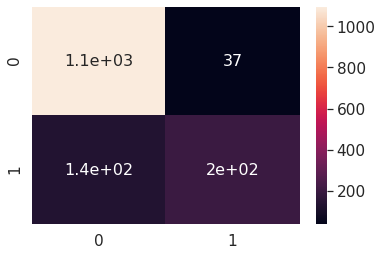

In [38]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(CM, annot=True, annot_kws={"size": 16}) # font size


#Bar Graph of number of misclassified cases vs True Label

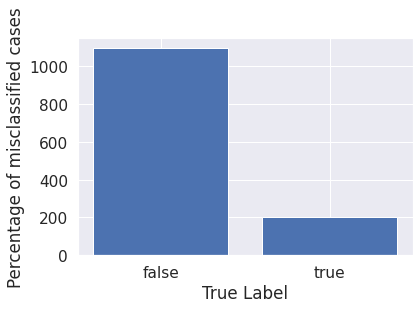

In [40]:

plt.bar(np.array(['false','true']),np.diag(CM))
plt.xlabel('True Label')
plt.ylabel('Percentage of misclassified cases')
plt.show()

#Bar Graph of Percentage of misclassified cases vs True Label

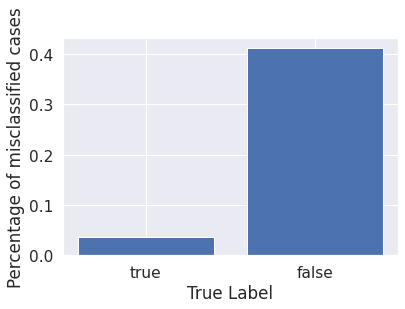

In [36]:
percent = 1 - np.diag(CM) / np.sum(CM, axis=1)
plt.bar(np.array(['true','false']),percent)
plt.xlabel('True Label')
plt.ylabel('Percentage of misclassified cases')
plt.show()